<a href="https://colab.research.google.com/github/jessamcs/Week6_regression/blob/main/RegressionTreeExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
 #Run a regression tree model with default parameters (unlimited depth)
 #Determine the depth of the default tree.
 #Try different values for max_depth and determine the optimal value based on the best (highest) r2 value. 
 #What is the optimal max_depth based on your trials?
 #What is the r2 of your final model on the training set and on the test set?
 # Importing the libraries 
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

#Regression Tree
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X, y)

from sklearn.metrics import r2_score
from sklearn import metrics

data= read_csv('/content/Boston_Housing_from_Sklearn.csv')
print(data.head(5))

      CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0  0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1  0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2  0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3  0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4  0.06905  0.458  7.147  54.2     18.7   5.33   36.2


In [13]:
y = data['PRICE']
X = data.drop(columns = 'PRICE')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
dec_tree = DecisionTreeRegressor(random_state = 42)



In [14]:
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [15]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


In [16]:
#Default Depth
dec_tree.get_depth()

20

In [17]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.7089458256236383
0.6370379660938668


In [18]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.999476270721798
0.7338563810264247


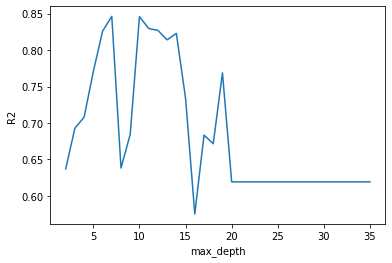

In [19]:
max_depth_range = list(range(2, 36))

#R^2
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [20]:
# Run the model with our optimized value for max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.9821037319610881
0.6845876043422093


In [23]:
 #What is the r2 of your final model on the training set and on the test set?
# Model prediction on train data
y_pred = reg.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

# Model prediction on test data
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 1.0
Adjusted R^2: 1.0
R^2: 1.0
Adjusted R^2: 1.0
